# Wat is een API
## API: oversimplified
Een API (of Application Programming Interface) is niks meer dan een programmatje maken en de resultaten door communiceren met een URL. In die URL zet je informatie die andere kunnen lezen, veranderen of verwijderen. 

Het is mogelijk om de api lokaal te draaien, maar het kan ook online. Wat je hiervoor nodig hebt is toegang tot een linux server via services als AWS, Linode of Digital Ocean. Als je dit wil koppelen aan een site moet je ook een extra domeinnaam aanschaffen. 

Er zijn veel verschillende soorten API, maar de meest gebruikte is RESTful API. Deze heb ik ook gebruikt. RESTful API heeft een paar methodes die je kan gebruiken. Dit zijn:

- GET - opvragen van informatie

- PUT - informatie veranderen

- POST - informatie toevoegen

- DELETE - informatie verwijderen

## Waarom kunnen API's handig zijn voor Tau Omega
Omgaan met API's kan voor Tau Omega handig zijn voor het volgende:

- resultaten van modellen geven aan klanten zonder het model te geven

- data live maken

- data inlezen vanuit andere API's

## Hoe moet je API's gebruiken/maken
### Library's / toolboxen
Tijdens het onderzoeken is er gewerkt met `Flask` en `Flask Restful`. Flask is een python library die gebruikt wordt voor python-web apps. Flask zet een lokale server op waarmee je onderandere ook API's kan maken. 

Daarnaast is er ook gewerkt met de package `requests`. Dit een standaard package python die via url's informatie ophaalt. 

### Terminal / cmd
Het idee is dat je een apparte `.py` script maakt en die uitvoert in de terminal/cmd (ligt er aan of je windows/mac/linux doet). Iets wat je aan het begin veel open hebt staan is je terminal en je internetbrowser. 

## API: Doelen

- API maken voor mezelf

- API inlezen voor mezelf

- Hoe maak je een API beschikbaar voor anderen?

- Informatie uit twee bronnen samenvoegen

- ML model aanroepen vanuit API

- Registreren van users en calls

- ~~Beveiliging toevoegen met Oauth2~~ Beveiliging toevoegen

____

# Doelen uitwerken
## API maken voor mezelf
We beginnen met een kleine *Hello World* applicatie. 

In [1]:
# initialiseer de library's en app
from flask import Flask, jsonify

app = Flask(__name__)

# Geef het pad van de app aan
@app.route("/")
def hello():
    # de inhoud wordt vaak als json gelezen. Dit is geen eis.
    inhoud = jsonify({
    "about":"Hello World!"
    }) 
    return inhoud

if __name__ == "__main__":
    # De debug modus op True betekent dat je de code kan veranderen terwijl de app loopt
    app.run(debug = True)

Dit script moet je in de terminal uitvoeren. Als je niet weet hoe, [volg dan deze cursus](https://www.codecademy.com/courses/learn-the-command-line/lessons/navigation/exercises/your-first-command).

Als je dit dan uitvoert in de terminal, dan hoort het er zo uit te zien. Dingen die je moet zien is:

- Debug mode: on

- Running on http://127.0.01:5000/ (deze link kan bij sommigen ook http://localhost:5000/ zijn)


![Python output van code in terminal](img/basic1_run.png)

Door naar het adres te gaan krijg je het volgende te zien:

![Resultaat van Hello World API in browser](img/basic1_browser.png)

Dit is het JSON bestand dat je in het python bestand gemaakt hebt.

Je kan de API iets ingewikkelder maken door het pad meetenemen als input. In `flask_basic_app.py` staat een nieuwe functie genaamd `get_multiply10`. Het pad van deze functie is te vinden in http://127.0.01:5000/multi/5. Voor elke integer kan de website deze functie uitvoeren. In dit geval zou het resultaat 50 zijn. 

In [ ]:
@app.route("/multi/<int:num>", methods = ["GET"]) # De methods = ["GET"] is de default.
def get_multiply10(num):
    return jsonify({
    "result": num*10
    })

![Resultaat van get_multiply10 API in browser](img/basic_app_5.png)


Deze functies zijn alleen nog maar gemaakt met `Flask` en niet `Flask RESTful`. Om je code leesbaarder te maken kunnen we `Flask RESTful` gebruiken. Code als `HelloWorld` en `get_multiply10` ziet er dan zo uit (dit is `flask_restful_basic.py`):

In [ ]:
from flask import Flask, request
from flask_restful import Resource, Api

app = Flask(__name__)
api = Api(app)

class HelloWorld(Resource):
    def get(self):
        return {"about":"Hello World!"}

class Multi(Resource):
    def get(self, num):
        return {"result": num*10}


api.add_resource(HelloWorld, "/")
api.add_resource(Multi, "/multi/<int:num>")

if __name__ == "__main__":
    app.run(debug=True)

### Voorbeeld binnen Tau Omega
Een klant zou via deze manier de resultaten van een model kunnen krijgen zonder dat de resultaten van het model op de server/computer moet staan.

### Eventuele aanschaffing van software/hardware
Niets

### Bronnen
- https://www.youtube.com/watch?v=s_ht4AKnWZg

- https://medium.com/python-pandemonium/build-simple-restful-api-with-python-and-flask-part-1-fae9ff66a706
____

## API inlezen voor mezelf
Om een API in te lezen gebruiken we `requests`. Deze haalt informatie via een URL. 

Om `HelloWorld` in te lezen kan je de volgende code gebruiken:

In [43]:
import requests

url = "http://127.0.0.1:5000/"

content = requests.get(url)
content, content.json()

(<Response [200]>, {'about': 'Hello World!'})

Response [200] betekent dat het ophalen van informatie gelukt is. Voor de andere codes zie [wikipedia](https://nl.wikipedia.org/wiki/Lijst_van_HTTP-statuscodes).

Om `get_multiply10` aan te roepen gebruiken we de volgende code:

In [44]:
import requests

url = "http://127.0.0.1:5000/multi/5"

content = requests.get(url)
data = content.json()
data["result"]

5

Om de Toggl API op te vragen moet je voldoen aan de authenticatie. Hiervoor heb je een toggl API token nodig en zet die ipv de tekst tussen de < >. 

In [50]:
import requests
import pandas as pd
url = "https://www.toggl.com/api/v8/workspaces"

response = requests.get(url, auth = ("<api token>", "api_token"))
TauOmegaWorkspace = response.json()[1]
print(response, "\n")

<Response [200]> 



In [57]:
pd.DataFrame(TauOmegaWorkspace, index = [0])

,id,name,profile,premium,admin,default_hourly_rate,default_currency,only_admins_may_create_projects,only_admins_see_billable_rates,only_admins_see_team_dashboard,projects_billable_by_default,rounding,rounding_minutes,api_token,at,ical_enabled
0,3268454,Tau Omega,0,False,True,0,USD,False,False,False,True,1,0,43f517a93b163b7727fcf72e79e704b6,2019-02-26T12:40:27+00:00,True


### Voorbeeld binnen Tau Omega
Een klant van ons heeft data, maar wil die niet beschikbaar stellen voor ons. Dan zouden wij toch via een API hun data kunnen ophalen zonder dat we de data opslaan.

### Eventuele aanschaffing van software/hardware
Wij niet, de klant moet eventueel wel een API beschikbaar maken voor ons en deze ook zeker beveiligen. 

### Bronnen

- https://github.com/swappsco/toggl-python-api-client/blob/master/toggl/api_client.py

- https://stackoverflow.com/questions/17301938/making-a-request-to-a-restful-api-using-python

____

## API beschikbaar maken voor iemand anders
Dit is een stuk die ik niet volledig heb afgemaakt. Mijn bronnen zijn twee youtube video's van een gast die het voordoet. Snel kwam ik er achter dat het geld kost om het te proberen. Misschien dat ik dit later nog ga proberen als test. 

### Voorbeeld binnen Tau Omega
Een klant zou via deze manier de resultaten van een model kunnen krijgen zonder dat de klant het model op de server/computer heeft staan.

### Eventuele aanschaffing van software/hardware

- Nieuwe domein naam voor onze API

- Een service die linux servers opzet zoals AWS, Linode of Digital Ocean

### Bronnen

- https://www.youtube.com/embed/goToXTC96Co

- https://youtu.be/LUFn-QVcmB8

___

## Meerdere databronnen samenvoegen
Het samenvoegen van meerdere API kan erg handig zijn. Hiervoor gebruik ik de API's van [HERE](https://developer.here.com/). Je kan een gratis account aanmaken. Je gaat pas betalen als je meer dan 250.000 *transactions* doet. Ik weet niet precies wat transactions zijn, maar zoveel ga ik er toch niet maken.

Als eerste moeten een paar dingen vastgesteld worden. De volledige url bestaat namelijk uit een paar vaste dingen:

- base_url -> dit is de basis url van HERE

- path -> dit verteld welk product van HERE je wil gebruiken en welke versie (volgensmij)

- resource ->

- Format specifier -> in welk format je de data terug wil hebben (vaak JSON)

- api_id -> jouw inlog ID

- api_code -> jouw inlog code

Dit zijn vaak standaard dingen die je nodig hebt. Deze kunnen nogsteeds per product veranderen. Je moet opzoek gaan naar **Constructing a Request** in de documentatie [(hier een voorbeeld)](https://developer.here.com/documentation/geocoder/topics/request-constructing.html). Daarnaast kan je ook nog specifieke parameters toevoegen. Deze parameters zijn strict afhankelijk van de resource. Hieronder gebruiken we de weather API.

In [78]:
import requests
base_url = "https://weather.api.here.com"
path = "/weather/1.0"
resource = "/report"
returnFormat = "json"
api_id = "fg3NOmFso5UhKWsNuFcN"
api_code = "msWPts3sbJXGksFP1DWA7Q"
parameter = {"product": "observation",
             "name": "Tilburg"}
parameterKeys = list(parameter.keys())

Met deze elementen gedefinieerd kunnen we de URL maken. Dit is vaak in de vorm van 
`base_url/path/resource.returnFromat/?app_id=api_id&app_code=api_code&parameter_name=parameter_value`

In [151]:
urlWeather = "{}{}{}.{}?app_id={}&app_code={}&{}={}&{}={}".format(
    base_url,
    path,
    resource,
    returnFormat,
    api_id,
    api_code,
    parameterKeys[0],
    parameter[parameterKeys[0]],
    parameterKeys[1],
    parameter[parameterKeys[1]]
)
urlWeather

'https://image.maps.api.here.com/mia/1.6/mapview.json?app_id=fg3NOmFso5UhKWsNuFcN&app_code=msWPts3sbJXGksFP1DWA7Q&mode=retrieveAddresses&prox=51.5779,5.0655,250'

Omdat deze URL al de inlog codes/token bevat, is het niet nodig om authorisatie toe te passen. Door de api op te vragen en te graaien in de JSON vinden we uiteindelijk de latitude en longitude.

In [78]:
responseWeather = requests.get(urlWeather)
TilburgWeather = responseWeather.json()
observ1 = TilburgWeather["observations"]["location"][0]["observation"][0]
lat = observ1["latitude"]
long = observ1["longitude"]
lat, long

(51.5779, 5.0655)

Met de *reverse geocoder api* kunnen we opzoeken waar het meetpunt in Tilburg is. De parameters onder de naam `prox` moet de format `(lat, long, radius)` hebben. Hierbij is de radius in meters. Deze zoekt naar een adres binnen 250 meter van de coordinaten.

In [79]:
base_url = "https://reverse.geocoder.api.here.com"
path = "/6.2"
resource = "/reversegeocode"
returnFormat = "json"
api_id = "fg3NOmFso5UhKWsNuFcN"
api_code = "msWPts3sbJXGksFP1DWA7Q"
parameter = {"mode": "retrieveAddresses",
             "prox": "{},{},{}".format(lat, long, 250)}
parameterKeys = list(parameter.keys())

urlGeolocation = "{}{}{}.{}?app_id={}&app_code={}&{}={}&{}={}".format(
    base_url,
    path,
    resource,
    returnFormat,
    api_id,
    api_code,
    parameterKeys[0],
    parameter[parameterKeys[0]],
    parameterKeys[1],
    parameter[parameterKeys[1]]
)


responseGeo = requests.get(urlGeolocation)
GeoInfo = responseGeo.json()
GeoInfo["Response"]["View"][0]["Result"][1]["Location"]["Address"]

{'Label': 'Midden-Brabantweg, 5048 Tilburg, Nederland',
 'Country': 'NLD',
 'State': 'Noord-Brabant',
 'County': 'Tilburg',
 'City': 'Tilburg',
 'Street': 'Midden-Brabantweg',
 'PostalCode': '5048',
 'AdditionalData': [{'value': 'Nederland', 'key': 'CountryName'},
  {'value': 'Noord-Brabant', 'key': 'StateName'},
  {'value': 'Tilburg', 'key': 'CountyName'}]}

Het is de Midden-Brabantweg. Wat zou het mooi zijn als ik kon zien waar dat in Tilburg is. Hiervoor kunnen we de *Image Maps API* voor gebruiken. Met de `zoom` parameter kan je de kaart vergroten. 20 is volledig uitvergroot en 0 is helemaal niet. 

In [155]:
import shutil
from PIL import Image


base_url = "https://image.maps.api.here.com"
path = "/mia/1.6"
resource = "/mapview"
app_id = "fg3NOmFso5UhKWsNuFcN"
app_code = "msWPts3sbJXGksFP1DWA7Q"
imageFormat = "0" # 0 = PNG, 1 = JPG, 2 = GIF, 3 = BMP
zoom = 13


urlMap = "{}{}{}?app_id={}&app_code={}&f={}&lat={}&lon={}&z={}".format(
    base_url,
    path,
    resource,
    app_id,
    app_code,
    imageFormat,
    lat,
    long,
    zoom
)

r = requests.get(urlMap)

Deze link verwijst direct naar een afbeelding. Dit is voor een text editor niet te lezen, voorbeeld:
`\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xf0\x00\x00\x01@\x08\x02\x00\`

Dit moet eerst uitgeschreven worden naar een afbeelding en vervolgens ingelezen worden met **PIL**.

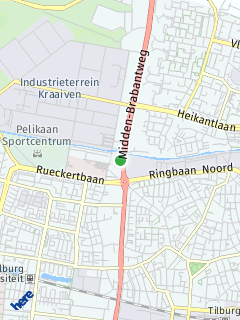

In [156]:
if r.status_code == 200:
    with open("img/map.png", 'wb') as f:
        for chunk in r.iter_content(1024):
            f.write(chunk)
            
img = Image.open("img/map.png")
img

### Voorbeeld voor binnen Tau Omega
Het verbinden met deze API zou InConnect helpen om de afstand tussen brandweerkazernes en huizen te berekenen. Of om een bepaald soort kever te herkennen in de bossen (sataliet beelden ook mogelijk, zie hieronder).

### Aanschaffen van software/hardware
HERE is gratis tot een bepaald aantal calls. Mocht je snel over het Freemium plan gaan, dan kan het redelijk duur worden. Er zijn meer bedrijven die API's zoals HERE aanbieden. Google heeft ook een [Maps API](https://developers.google.com/maps/documentation/?hl=nl).

### Bronnen

- https://developer.here.com/documentation/weather/topics/request-constructing.html

- https://developer.here.com/documentation/geocoder/topics/what-is.html

- https://developer.here.com/documentation/map-image/topics/quick-start-show-default-location.html

- https://stackoverflow.com/questions/13137817/how-to-download-image-using-requests

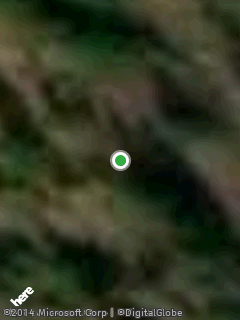

In [168]:
import shutil
from PIL import Image


base_url = "https://image.maps.api.here.com"
path = "/mia/1.6"
resource = "/mapview"
app_id = "fg3NOmFso5UhKWsNuFcN"
app_code = "msWPts3sbJXGksFP1DWA7Q"
imageFormat = "0" # 0 = PNG, 1 = JPG, 2 = GIF, 3 = BMP
zoom = 20
lat = 47.174431
long = 14.516640
typeMap = 1 # 0 = normal, 1 = sataliet, 2 = terrain

urlMap = "{}{}{}?app_id={}&app_code={}&f={}&lat={}&lon={}&z={}&t={}".format(
    base_url,
    path,
    resource,
    app_id,
    app_code,
    imageFormat,
    lat,
    long,
    zoom, 
    typeMap
)

r = requests.get(urlMap)
if r.status_code == 200:
    with open("img/sataliet.png", 'wb') as f:
        for chunk in r.iter_content(1024):
            f.write(chunk)
            
img = Image.open("img/sataliet.png")
img

___

## ML model aanroepen + registreren van users en calls met beveiliging 
In dit kopje doe ik meerdere doelen samenvoegen omdat dat mooi kan. (Ik wilde eerst Oauth2 beveiliging doen, maar dit is niet nodig voor ons).

In `read_file_api.py` staat de volledige code die ik hier ga uitleggen. De eerste *resource* (zo noem ik de verschillende classes) is een simpele `ReadFile`. Deze file kan je vullen met Machine Learning uitkomsten. 

In [ ]:
# basic api class
class ReadFile(Resource):
    def get(self, username, password):
        # check password
        if not check_password(username, password):
            return "User not recognized."

        # registrate api call in csv file
        registrate_call(username)

        # read in file
        with open("data.json", "r") as f:
            data = f.read()
        return json.loads(data)


Veel van de functies zoals `check_password` worden later uitgelegd. Het gaat om de structuur

- Check of de user is geregistreerd

- Registreer de call

- Lees de data.json file in

Het registreren van een call is redelijk simpel. In een .csv bestand staat geregistreerd welke user op welk tijdsstip een call heeft gedaan. Dit kan ook in een database gedaan worden voor betere beveiliging. 

In [ ]:
# We want to registrate every api call
def registrate_call(usrname):
    # read in all the calls
    df = pd.read_csv("user_calls.csv", sep = ";")

    # define this api call
    df_add = pd.DataFrame({"user": [usrname],
                           "calldate": [datetime.now().ctime()]}, columns= ["user", "calldate"])

    # append the call to the most recent table
    df = pd.concat([df, df_add], sort = False)

    # write to file
    df.to_csv("user_calls.csv", sep= ";", index = False)

Als volgende komt de beveiliging. Dit is redelijk nieuw. De package die ik hiervoor gebruik is `cryptography`. Als eerste willen we een wachtwoord encrypten. Dit doen we met de volgende functie:

In [ ]:
def encrypt_password(password):
    password_byte = password.encode() # convert password to bytes

    salt = b'\xadR\xc5\xc2\xe1\xb5\xae\xe5\xa8~\xba\x8e\xca\xff\xc5B'

    # define encryptor
    # use the same encryptor when you want to decrypt
    kdf = PBKDF2HMAC(
        algorithm = hashes.SHA256(),
        length = 32,
        salt = salt,
        iterations = 10000,
        backend = default_backend()
    )

    # derive password and encode
    key = base64.urlsafe_b64encode(kdf.derive(password_byte))
    return key

Eerst defineer je een `salt`. Dit is een random string die altijd hetzelfde is. Deze definieerd je encryptor. Deze kan je aanmaken met `salt = os.urandom(16)`. Met `PBKDF2HMAC` definieer je de encryptor met SHA256. Aan het eind haal je de (ge-encode) wachtwoord door de encryptor en encode je die met base64. Deze encoding wordt veel gebruikt met HTTP.

Bij behorende imports:

In [ ]:
import base64
import os
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.kdf.pbkdf2 import PBKDF2HMAC

Om je wachtwoord te decrypten doe je het omgekeerde. Vergeet niet om je key eerst te decoden voor je het door de encryptor haalt.

In [ ]:
def decrypt_password(password, key):
    password_byte = password.encode() # convert password to bytes

    salt = b'\xadR\xc5\xc2\xe1\xb5\xae\xe5\xa8~\xba\x8e\xca\xff\xc5B'

    # define encryptor
    # the same encryptor as before
    kdf = PBKDF2HMAC(
        algorithm = hashes.SHA256(),
        length = 32,
        salt = salt,
        iterations = 10000,
        backend = default_backend()
    )
    # verification will give error if the keys are not the same
    try:
        # decode key and verify
        kdf.verify(password_byte, base64.urlsafe_b64decode(key))
    except: # catch error when keys mismatch
        return False
    return True

Het checken van een wachtwoord gaat dan als volgt:

In [176]:
def check_password(username, password):
    df = pd.read_csv("user_info.csv", sep = ";")

    if sum(df.user == username) > 0: # check if username is known
        key = df.loc[df.user == username, "key"].item().encode() # find key
    else:
        return False

    return decrypt_password(password, key)

De andere resources zijn niet heel belangrijk voor het API gebeuren. Dit was meer om het onder de knie te krijgen.

En uiteindelijk werkt de API niet als je een verkeerd wachtwoord invoert.

In [177]:
import requests

url = "http://127.0.0.1:5000/test/test"
        
response = requests.get(url)
response.json()

'User not recognized.'

En wel als je het correcte wachtwoord invoert. 

In [179]:
import requests

url = "http://127.0.0.1:5000/simcha3/password"
        
response = requests.get(url)
response.json()

{'input': [1, 2, 3], 'output': [4, 8, 12]}

Deze worden ook registreerd in de file `user_calls.csv`.

![Call registratie](img/user_calls.png)

En ook de users worden opgeslagen met hun gehashte wachtwoord (alle wachtwoorden hier zijn *password*):

![User wachtwoorden](img/user_info.png)

### Voorbeeld

### Aanschaffen

### Bronnen

- https://www.youtube.com/watch?v=H8t4DJ3Tdrg